# How impact of weather on ride frequency ?

We are analyzing a new ride-sharing company Zuber, that's launching in Chicago. 
Our task is to find patterns in the available information. 
We want to understand passenger preferences and the impact of external factors on rides.
Working with a database, we'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

## Goal:

Test hypotheses:

1. Test statistical hypotheses  the average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays 

##  Plan:
1. Colecting the data
2. Prepare the data and exploring the data
3. Study data behaviour
4. Test statistical hypotheses
5. General conclusion

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Colecting data
df_company = pd.read_csv('/datasets/project_sql_result_01.csv')
df_location= pd.read_csv('/datasets/project_sql_result_04.csv')
df_3 = pd.read_csv('/datasets/project_sql_result_07.csv')

##  Explore initial data

project_sql_result_01.csv. It contains the following data:
- company_name: taxi company name
- trips_amount: the number of rides for each taxi company on November 15-16, 2017.


project_sql_result_04.csv. It contains the following data:
- dropoff_location_name: Chicago neighborhoods where rides ended
- average_trips: the average number of rides that ended in each neighborhood in November 2017.  



project_sql_result_07.csv — the result of the last query. It contains data on rides from the Loop to O'Hare International Airport:
- start_ts — pickup date and time
- weather_conditions — weather conditions at the moment the ride started
- duration_seconds — ride duration in seconds
    
    
    
    
    
    

##  Prepare the data

Let's explore each df to get an initial understanding of the data and do necessary corrections to each table if necessary.

### df_company

In [3]:
# Print sample of data
df_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
# Print general information/summury of data
df_company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
# Check for missing values
df_company.isna().sum()

company_name    0
trips_amount    0
dtype: int64

### df_location

In [6]:
# Print sample of data
df_location.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [7]:
# Print general information/summury of data
df_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [8]:
# Check for missing values
df_location.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

### df_3

In [9]:
# Print sample of data
df_3.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [10]:
# Print generalinformation/summury of dataset of df_3
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [11]:
# Check for missing values 
df_3.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
dtype: int64

In [12]:
# Let's check column 'start_ts'
type(df_3.start_ts[0])

str

### Fix data

In [13]:
# Convert to Timestamps
df_3['start_ts'] = pd.to_datetime(df_3['start_ts'],format ='%Y-%m-%d' )

In [14]:
# Check it again
type(df_3.start_ts[0])

pandas._libs.tslibs.timestamps.Timestamp

###  Conclusion

- Thera is no missing values and inappropriate data types 
- The data in DataFrames represented object and float64
- The data in  'column start_ts' of df_3 represented as object so it will be converted to Timestamp

##  Study the data

For these two datasets we now need to:

- identify the top 10 neighborhoods in terms of drop-offs
- make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
- draw conclusions based on each graph and explain the results

### Identify the top 10 neighborhoods in terms of drop-offs

In [15]:
# Identify the top 10 neighborhoods in terms of drop-offs

top_10_neighborhoods = df_location.sort_values(by='average_trips',ascending = False).head(10)
top_10_neighborhoods


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


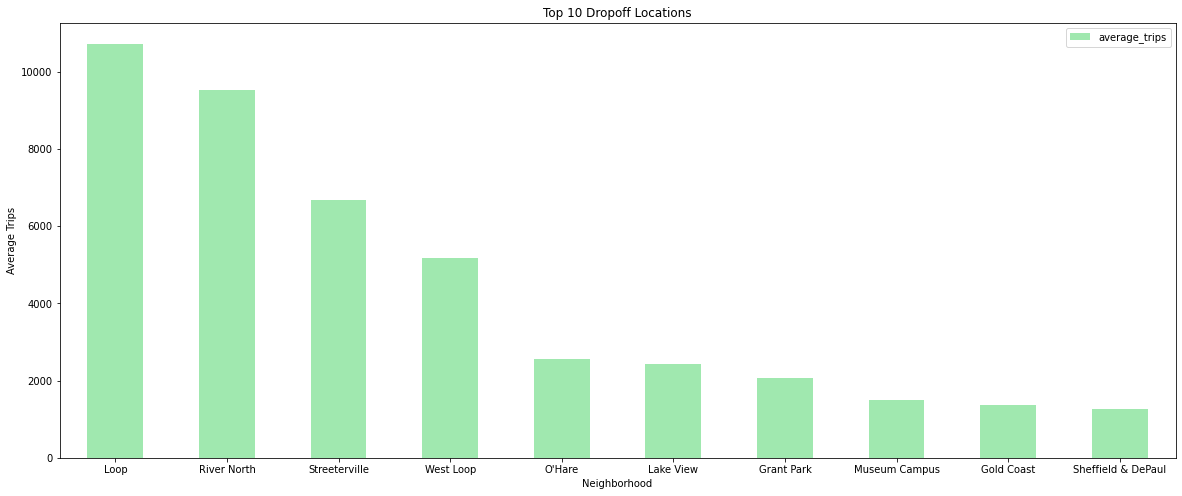

In [16]:
# The bar chart showing distribution of 10 drop off location of neighborhoods in Chicago

top_10_neighborhoods.plot.bar(x='dropoff_location_name', y='average_trips', rot=0, figsize=(20, 8),color=['#A0E8AF'])

plt.title('Top 10 Dropoff Locations')#titles the chart: Top 10 Dropoff Locations
plt.xlabel('Neighborhood')#labels the x-axis: Neighborhood
plt.ylabel('Average Trips')#labels the y-axis: Average Trips
plt.show()#shows the plotted chart

- As we see top 3 leading location are Loop, River North,Streetervulle

### Taxi companies and number of rides

In [17]:
df_company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [18]:
# Numerical description of average_trips column
df_company['trips_amount'].describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

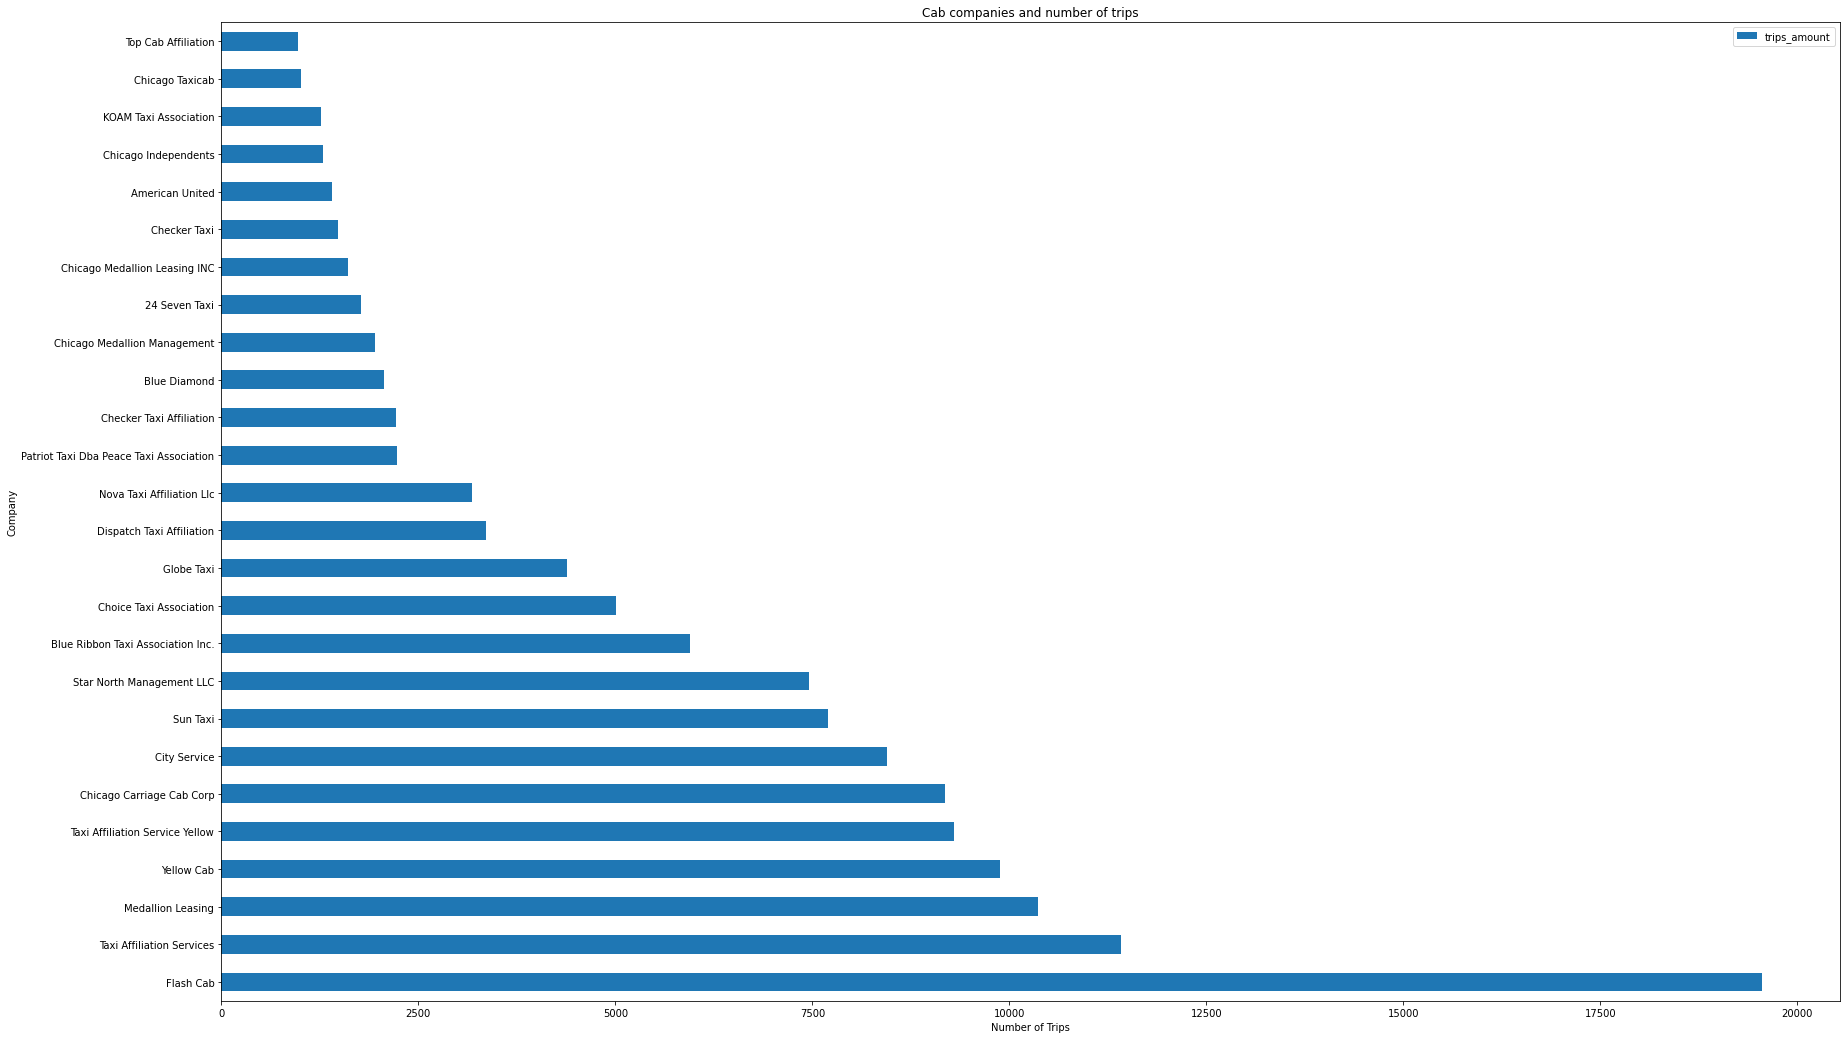

In [19]:
# This bar chart showing distribution of number of rides taxi companies
df_company.query('trips_amount >= 500').plot.barh(x='company_name', y='trips_amount', rot=0, figsize=(29, 18))
plt.title('Cab companies and number of trips')
plt.xlabel('Number of Trips')
plt.ylabel('Company')
plt.show()

- The leading company in terms of the number of trips is Flash Cab with 19558 trips

Flash Cab is clearly at the top, by a lot. They probably own more cabs on the road. Second is Taxi Affilliation Services. After filtering with a threshold of 500, there are only 26 companies in our chart. That means 38 companies had fewer than 500 trips, so most of the market share is held by a smaller number of companies

## Test statistical hypotheses

- Test the hypothesis that the duration of rides from the the Loop to O'Hare International Airport changes on rainy Saturdays

- null hypothesis H₀: the average user duration of rides from  the Loop to O'Hare International Airport on rainy Saturdays  are the are equal(same), there’s no difference.( no changes)

- hypothesis H₁ : the average user duration of rides from  the Loop to O'Hare International Airport on rainy Saturdays  are not equal(not same), there is difference.(have changes)

- alpha value - 5%

In [20]:
# Let's have a look our dataset which is we are going to test
df_3.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [21]:
df_3.groupby('weather_conditions')['duration_seconds'].sum().sort_values(ascending = False)

weather_conditions
Good    1775712.0
Bad      436897.0
Name: duration_seconds, dtype: float64

In [22]:
# Retrive from df_3  where the weahter is'Good' by slicing
good_weather = df_3.query('weather_conditions == "Good"')
good_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 1066
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            888 non-null    datetime64[ns]
 1   weather_conditions  888 non-null    object        
 2   duration_seconds    888 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.8+ KB


In [23]:
#Ccreates slice from df_3 where the weather condition is "Bad" 
bad_weather = df_3.query('weather_conditions == "Bad"')
bad_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            180 non-null    datetime64[ns]
 1   weather_conditions  180 non-null    object        
 2   duration_seconds    180 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.6+ KB


In [24]:
# Test hypothesis
from scipy import stats as st
import numpy as np

good_weather = df_3.query('weather_conditions == "Good"')
bad_weather = df_3.query('weather_conditions == "Bad"')

#set alpha
alpha = 0.05

#calculate result
results = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'],equal_var=False)
print('p-value:', results.pvalue)

#check our hypothesis
if(results.pvalue<alpha):
    print('We reject the null hypothesis')
else:
    print('We can\'t reject the null hypothesis')

p-value: 6.738994326108734e-12
We reject the null hypothesis


In [25]:
# Test our hypothesis using Levene's test
from scipy import stats as st
import numpy as np

alpha = 0.05 #sets our alpha to 5%
result = st.levene(good_weather['duration_seconds'], bad_weather['duration_seconds'], center='mean')
#implements Levene's test on our slice columns specifying that the variances were calculated from the mean
print('p-value:', result.pvalue)#prints the p-value
if result.pvalue > alpha:#if the p-value is greater than alpha
    print('The variances are approximately the same')#The variances are approx. the same
else:#i.e if the p-value is less than alpha
    print('The variances are too far apart to be considered homogeneous')
    #The variances can't be considered homogeneous

p-value: 0.3968505113995001
The variances are approximately the same


# General Conclusion

1.In the data's preparation & exploration stage:

- We observed missing values of columns in Dataframe
- There is no missing values in our dataset


2.In the data transformation and data-cleaning process stage:
- The data in 'column start_ts' of df_3 represented as object so it was converted to Timestamp  


3.In analysis stage to answer our questions we got next conclusion:
- We looked at taxi companies and number of rides.
- The leading company in terms of the number of trips is Flash Cab with 19558 trips. That means the most popular taxi companies were Flash Cab and Taxi Affiliation Services
-  We identify the top 10 neighborhoods in terms of drop-off so top 3 leading location are Loop, River North,Streetervulle

- by Testing the hypothesis:
- We reject the null hypothesis.
- It means the average user duration of rides from the Loop to O'Hare International Airport on rainy Saturdays are not equal(not same), there is difference.(have changes)
- Rainy weather impact to ride frequency.


